# Brief 

This is an exploratory notebook to test out different pre-trained Keras models for image processing. We will be using the models to predict image features, and then comparing features between images using cosine similarity. 

Images with the highest cosine similarity scores will be generated as recommendations.


In [39]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

# 1. Loading Pre-trained Keras Image Models



In [40]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt


from keras.models import Model
from keras.preprocessing.image import load_img,img_to_array
from keras.applications import (vgg16,  vgg19, xception, 
                                inception_v3,  inception_resnet_v2, 
                                mobilenet,densenet, nasnet, mobilenet_v2)
vgg16_model = vgg16.VGG16(weights='imagenet')
# vgg19_model = vgg19.VGG19(weights='imagenet')
# mobv2= mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, 
#                                        include_top=True, 
#                                        weights='imagenet')
# nasnetmobile = nasnet.NASNetMobile(weights="imagenet")
# largest_dense_net = densenet.DenseNet201(weights="imagenet")
# mobilenet_ = mobilenet.MobileNet(weights="imagenet")
# incepv2 = inception_resnet_v2.InceptionResNetV2(include_top=True, weights='imagenet', 
#                                                 input_tensor=None, input_shape=None, pooling=None, classes=1000)
# incepv3 = inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, 
#                                    input_shape=None, pooling=None, classes=1000)
# Xception_ = xception.Xception(include_top=True, weights='imagenet', input_tensor=None, 
#                               input_shape=None, pooling=None, classes=1000)
# large_nasnet = nasnet.NASNetLarge(input_shape=None, include_top=True, weights='imagenet', 
#                                   input_tensor=None, pooling=None, classes=1000)

# 2. Cleaning an image dataset

Given a dataset of PNGs:
 - we need to resize each image
 - We need to convert each image to a 3-dimensional matrix
 - Pre-process the matrix using Keras built-in functions


In [44]:
images_directory = '/content/images/'

In [64]:
class ImageRecommenderSystem : 
    
    def __init__(self, model, list_of_images, filespath='/content/images/') : 
        self.model = model
        self.filespath = filespath
        self.list_of_images = list_of_images

        # Since ouput.shape returns object dimension, just eval it to get integer ...
        self.image_width = eval(str(self.model.layers[0].output.shape[1]))
        self.image_height = eval(str(self.model.layers[0].output.shape[2]))
        
        # Remove the last layers in order to get features instead of predictions
        self.image_features_extractor = Model(inputs=self.model.input, outputs=self.model.layers[-2].output)
        self.processed_image = self.image_to_matrix()
        self.sim_table = self.get_similarities(self.processed_image)
        
    def load_image(self, image_url) :
        try : 
            pil_image = load_img(self.filespath + image_url, target_size=(self.image_width, self.image_height))
            return pil_image
        except OSError : 
            # image unreadable, remove from list
            self.list_of_images = [x for x in self.list_of_images if x != image_url]
            #self.list_of_images.remove(image_url)
            pass
        
    def image_to_matrix(self) :
        """
        # convert the PIL image to a numpy array
        # in PIL - image is in (width, height, channel)
        # in Numpy - image is in (height, width, channel)
        # convert the image / images into batch format
        # expand_dims will add an extra dimension to the data at a particular axis
        # we want the input matrix to the network to be of the form (batchsize, height, width, channels)
        # thus we add the extra dimension to the axis 0.
        """
        #from keras.preprocessing.image import load_img,img_to_array
        list_of_expanded_array = list()

        for i in self.list_of_images:
          tmp = img_to_array(self.load_image(i))
          expand = np.expand_dims(tmp, axis = 0)
          list_of_expanded_array.append(expand)

        # for i, elem in enumerate(self.list_of_images):
        #     try :
        #         print(self.list_of_images)

        #         tmp = img_to_array(self.load_image(self.list_of_images[i]))
        #         expand = np.expand_dims(tmp, axis = 0)
        #         list_of_expanded_array.append(expand)
        #     except ValueError : 
        #         # self.list_of_images = [x for x in self.list_of_images if x != self.list_of_images[i]]
        #         self.list_of_images.remove(self.list_of_images[i])

        images = np.vstack(list_of_expanded_array)
        
        return preprocess_input(images)
    
    def get_similarities(self, processed_imgs) :
        print('============ Similarity Prediction =========')
        imgs_features = self.image_features_extractor.predict(processed_imgs)
        print(f"Given image has {imgs_features.size} features:")
        cosSimilarities = cosine_similarity(imgs_features)
        cos_similarities_df = pd.DataFrame(cosSimilarities, columns=self.list_of_images[:len(self.list_of_images)], index=self.list_of_images[:len(self.list_of_images)])
        return cos_similarities_df
    
    def most_similar_to(self, given_img, num_similar_images = 5):

        print("-----------------------------------------------------------------------")
        print("Original image:")

        original = self.load_image(given_img)
        plt.imshow(original)
        plt.show()

        print("-----------------------------------------------------------------------")
        print("Most similar image:")

        closest_imgs = self.sim_table[given_img].sort_values(axis=0, ascending=False)[1:num_similar_images+1].index
        closest_imgs_scores = self.sim_table[given_img].sort_values(ascending=False)[1:num_similar_images+1]

        for i in range(0,len(closest_imgs)):
            original = self.load_image(closest_imgs[i])
            plt.imshow(original)
            plt.show()
            print("similarity score : ",closest_imgs_scores[i])

length of files is  100
Pre-trained model(s) "[<keras.engine.functional.Functional object at 0x7f3ecfa8de50>]" is running
============ Similarity Prediction =========
Given image has 409600 features:
Most similar to 1903.jpg
-----------------------------------------------------------------------
Original image:


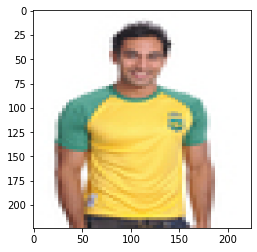

-----------------------------------------------------------------------
Most similar image:


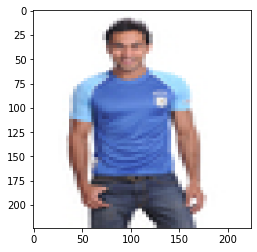

similarity score :  0.8342692


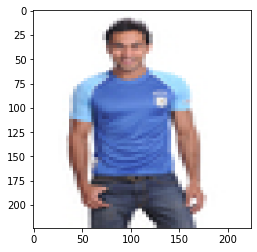

similarity score :  0.8342692


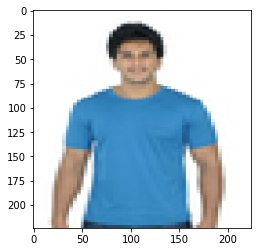

similarity score :  0.78899467


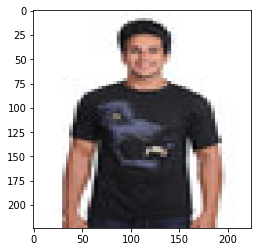

similarity score :  0.78889066


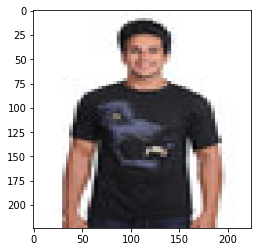

similarity score :  0.78889066
Most similar to 1581.jpg
-----------------------------------------------------------------------
Original image:


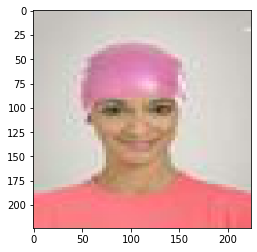

-----------------------------------------------------------------------
Most similar image:


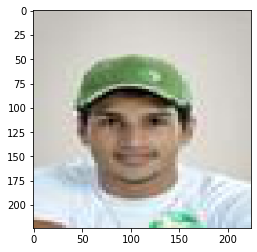

similarity score :  0.6947762


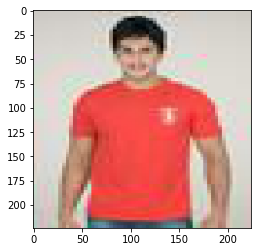

similarity score :  0.6719835


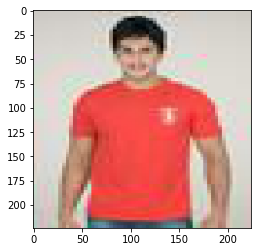

similarity score :  0.6719834


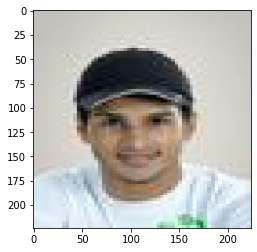

similarity score :  0.66999334


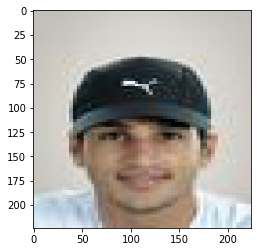

similarity score :  0.6414144
Next model ...




In [66]:
list_of_pretrained = [vgg16_model]
files = [x for x in os.listdir("/content/images") if x.endswith('jpg')]
files = np.random.choice(files, 100)

print('length of files is ', len(files))

for pretrained_model in list_of_pretrained : 
    print('=========================================')
    print(f'Pre-trained model(s) "{list_of_pretrained}" is running')
    print('=========================================')
    pretrained_recommender = ImageRecommenderSystem(pretrained_model, files, filespath = '/content/images/')

    print(f'Most similar to {files[0]}')
    print('=========================================')
    pretrained_recommender.most_similar_to(files[0])

    print(f'Most similar to {files[10]}')
    print('=========================================')
    pretrained_recommender.most_similar_to(files[10])

    print('Next model ...')
    print('\n')


# References:
    1. AlexWarembourg - https://towardsdatascience.com/image-recommendation-engine-leverage-transfert-learning-ec9af32f5239
 